In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data


Source: https://archive.ics.uci.edu/ml/datasets/Forest+**Fires

In [4]:
dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv'

forest_df = pd.read_csv(dataset_url)


Let's see the features and their data types

In [5]:
forest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


The dataset contains 517 examples and 13 columns, 12 features and 1 label (areas).

In [6]:
print(forest_df.shape)

(517, 13)


# Looking into the Data
We will not go deep into analysis, but let's try to learn about the data we have. Before that, we will first split the dataset into training and test set.

We will use Scikit-Learn train_test_split.



In [7]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(forest_df, test_size=0.3, random_state=42)

In [8]:
print('The shape of training data: {}\nThe shape of testing data: {}'.format(train_data.shape, test_data.shape))

The shape of training data: (361, 13)
The shape of testing data: (156, 13)


In [9]:
train_data.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
311,6,3,sep,sun,92.4,105.8,758.1,9.9,24.8,28,1.8,0.0,14.29
368,6,5,sep,sat,91.2,94.3,744.4,8.4,16.8,47,4.9,0.0,12.64
23,7,4,aug,sat,90.2,110.9,537.4,6.2,19.5,43,5.8,0.0,0.00
271,8,6,aug,tue,92.1,152.6,658.2,14.3,20.1,58,4.5,0.0,9.27
299,6,5,jun,sat,53.4,71.0,233.8,0.4,10.6,90,2.7,0.0,0.00


It seems that we have two categorical features, month and day. We will remember to encode them. For now we can see the number of samples in each month and later in each day.

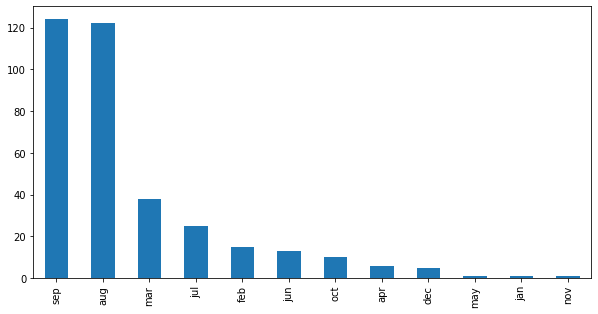

In [10]:
train_data['month'].value_counts().plot(kind='bar', figsize=(10,5))

# Preparing the Data for the Model
Here we will do two things, one is to normalize numerical features and the second is to encode categorical features. We can set up a pipeline to handle that.

For simplicity, we will use Scikit-Learn processing functions.

We will first separate features and label. We can use a function that can also be applied to test set.

In [11]:
def get_feats_and_labels(data, label):
  """ Take data and label as inputs, return features and labels separated """

  data_feats = data.drop(label, axis=1)
  data_label = data[label]

  return data_feats, data_label

Let's use the function created above to get the features and labels.

In [12]:
train_feats, train_label = get_feats_and_labels(train_data, 'area')

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

scaler = StandardScaler()
encoder = OrdinalEncoder()


# The column transformer requires lists of features

num_feats = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain']
cat_feats = ['month', 'day']

# define the pipeline to scale the numeric features and handle categorical features
final_pipe = ColumnTransformer([
   ('num',scaler , num_feats),    
   ('cat', encoder , cat_feats)                        

])

training_data_prepared = final_pipe.fit_transform(train_feats)


Now, we can see the shape of the transformed dataset. It is a NumPy array.

In [14]:
training_data_prepared.shape

(361, 12)

In [15]:
type(training_data_prepared)

numpy.ndarray

Also let's tranform the test set. Note that for the test set, we don't fit_transform().

We will get the features and labels separated first.

In [16]:
test_feats, test_label = get_feats_and_labels(test_data, 'area')

In [17]:
test_data_prepared = final_pipe.transform(test_feats)

In [18]:
train_label = train_label.to_numpy()
test_label = test_label.to_numpy()

# Creating, Compiling and Training a Model
Now that our data is prepared, it's time to create a neural network.
Everytime we are creating a model in TensorFlow, we have to specify the input shape. In this example, the input shape will be:

In [19]:
input_shape = training_data_prepared.shape[1:]
input_shape

(12,)

# Exercise

In [ ]:
#Create the model here. 

model = keras.models.Sequential([
                                 
            # Your layers must specify the input shape always. You can add as many dense layers as you want.
          
            # The last layer usually doesn't have activation function in regression
                     

])

# Now we compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
#Show your model summary here

In [20]:
#train your model here
model.fit(# insert the parameters)

# Evaluating a Model
After we have trained the model, the next step is to evaluate it.

In [21]:
#To evaluate the model, run this cell
model.evaluate(test_data_prepared, test_label)

#Bonus: Improving the model

In [ ]:
#Can you improve the model? 